### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

The independent variables would be whether the words are congruent or incongruent words. The dependent variables would be the time it takes to name the ink colors in equally-sized lists.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis would be that the population mean time it takes to name congruent or incongruent words are equal. The alternative hypothesis would be that the population mean time it takes to name congruent or incongruent words are different. 

$$H_o: \mu_{congruent} = \mu_{incongruent}$$
$$H_a: \mu_{congruent} \neq \mu_{incongruent}$$

The null hypothesis is generally that there is no effect between or that two groups are equal, in this case that the mean time it takes to state the color of the ink for a given population is roughly equivalent regardless of whether the words are congruent to the color of the ink or not. The alternative hypothesis in some way rejects the null hypothesis by saying that mean time it takes to state the color of the ink for a given word for a given population when incongruent to the text of the word is either greater than or less than the mean time it takes to state the color of the ink for a given word for a given population when congruent to the text of the word.

**Edit:** It would be best to use the bootstrap method to test which of these hypotheses hold. This is because both of the hypotheses rely on comparing the means of two populations, which is best done through the bootstrap method. Alternatively, a two-sided t-test could also be used but, as stated in lesson 12, a confidence interval test is the the same as a hypothesis test so long as there is a 'not equals' in the alternative hypothesis (which there is) and the confidence interval is the same as the error rate. Assuming a standard confidence interval of 95% would be equal to a 5% type one error rate in our hypothesis test, and this will be the confidence interval in the following sections. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

#import datafile
df = pd.read_csv('stroopdata.csv')
df.info()
print("\nMeans: ")
print(df.mean())
print("\nStandard Deviation:")
print(df.std())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes

Means: 
Congruent      14.051125
Incongruent    22.015917
dtype: float64

Standard Deviation:
Congruent      3.559358
Incongruent    4.797057
dtype: float64


--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

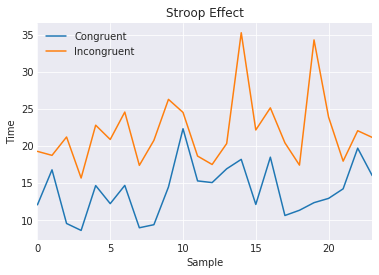

In [3]:
# Build the visualizations here
plt.figure(1, figsize = (70,50))
ax = df.plot(kind='line')
plt.title('Stroop Effect')
plt.xlabel('Sample')
plt.ylabel('Time');

The first thing that jumps out at me is that in all cases the incongruent samples took a longer time than the congruent samples. At all times the incongruent line was above the congruent line, indicating that incongruent strings on average take longer to name the color of the ink.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [5]:
# Perform the statistical test here
diff = []

for _ in range(10000):
    bootsample = df.sample(200, replace=True)
    mean_cong = bootsample['Congruent'].mean()
    mean_incong = bootsample['Incongruent'].mean()
    diff.append(mean_cong - mean_incong)
    
np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(-8.6309616249999994, -7.3196941249999998)

**Formally, we can reject the null hypothesis that the population mean time it takes to name congruent or incongruent words are equal, because quite clearly the mean times are not equal. ** This mostly supports what we've seen earlier. The difference between the congruent and incongruent is negative, indicating that it took longer to say the ink color of incongruent strings than congruent strings. The difference is also around what was observed before, on the order of magnitude near 10 seconds, which is a substantial difference. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

One obvious thought would be how contradictory it is to say the color of the text when one has been conditioned to read the text their whole lives. This difference in value observed could be hypothesised as the result of trying to overocme conditioning or instinctual habits. A similar phenomenon might be patting one's head while rubbing one's stomach. These two habits generally occur in isolation to one another, so when the both occur simultaneously it seems more natural for the right hand to be coordinated with the left. Generally, maintaining two seperate actions with either hand creates a similar sort of incoherence that the Stroop effect seems to measure. 